In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score

In [15]:
final = pd.read_csv("final_data.csv")

Prediction of PAM50 mRNA

In [16]:
final.drop(['RefSeq_accession_number','Metastasis-Coded','Tumor','AJCC Stage',"ER Status","PR Status","HER2 Final Status"],axis=True,inplace=True) #removing other targets and sample id

In [17]:
#corelation with the target "PAM50 mRNA"
x = pd.DataFrame(abs(final.corr()["PAM50 mRNA"]))

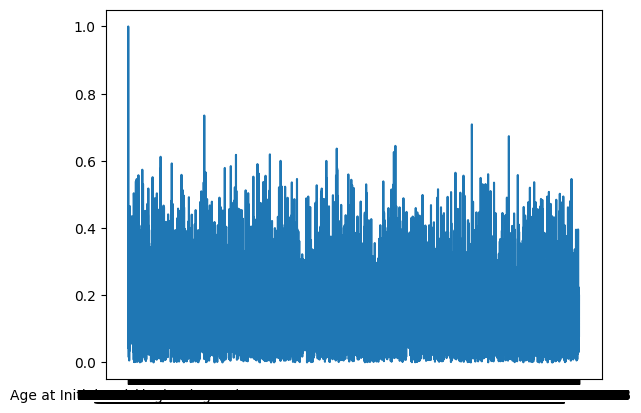

In [18]:
plt.plot(x)

In [19]:
x

,PAM50 mRNA
Gender,0.187472
Age at Initial Pathologic Diagnosis,0.196919
PAM50 mRNA,1.000000
NP_958782,0.045004
NP_958785,0.046424
...,...
XP_003846524,0.137244
NP_443073,0.061599
NP_001004456,0.222979
NP_997625,0.076662


In [23]:
len(x[x["PAM50 mRNA"]>0.4].index.tolist())

399

In [165]:
final2 = final[x[x["PAM50 mRNA"]>0.5].index.tolist()] #keeping features above 0.2 corelation, 444 proteins 

In [166]:
scaler = MinMaxScaler() #scaling
final2_scale = pd.DataFrame(scaler.fit_transform(final2.drop('PAM50 mRNA', axis=1)),columns=final2.columns.to_list()[1:])

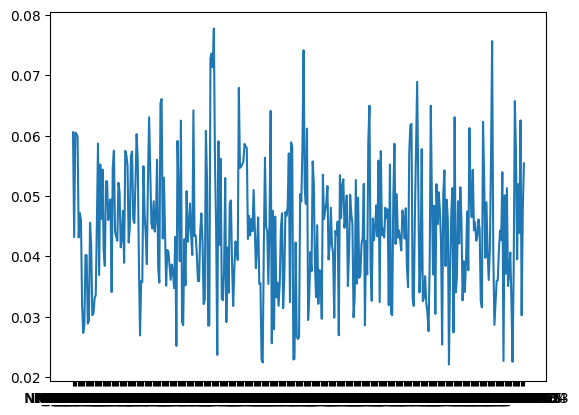

In [27]:
plt.plot(final2_scale.var())

In [177]:
final2_scale.shape

(77, 102)

In [216]:
X = final2_scale
y = final2['PAM50 mRNA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [217]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Precision:", precision_score(y_test, preds, average='micro'))
print("Recall:",recall_score(y_test, preds, average='micro'))
print("F1-Score:", f1_score(y_test, preds, average='micro'))
print(confusion_matrix(y_test, preds))

XGBoost's prediction accuracy is: 62.50
Precision: 0.625
Recall: 0.625
F1-Score: 0.625
[[4 0 0 0]
 [1 2 0 2]
 [1 0 4 2]
 [0 1 2 5]]


In [31]:
final2['PAM50 mRNA'].value_counts()

3    24
2    23
0    18
1    12
Name: PAM50 mRNA, dtype: int64

In [218]:
pca = PCA(n_components=10,random_state=42)
r = pca.fit_transform(X = X_train.values)
X_train_pca = pd.DataFrame(pca.transform(X_train.values))
print(X_train.shape, X_train_pca.shape)

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)

preds = xgb.predict(X_test_pca)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Precision:", precision_score(y_test, preds, average='micro'))
print("Recall:",recall_score(y_test, preds, average='micro'))
print("F1-Score:", f1_score(y_test, preds, average='micro'))
print(confusion_matrix(y_test, preds))

(53, 102) (53, 10)
XGBoost's prediction accuracy is: 75.00
Precision: 0.75
Recall: 0.75
F1-Score: 0.75
[[4 0 0 0]
 [1 2 1 1]
 [0 1 4 2]
 [0 0 0 8]]


C:\Users\shasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


0 : basal
1 : A
2 : B
3 : HER2

TODO: plot the variance caPTURED IN THE PCs and plot PC1 vs PC2

In [272]:
final = pd.read_csv("final_data.csv")

In [273]:
final[["Tumor","PAM50 mRNA"]].corr()

,Tumor,PAM50 mRNA
Tumor,1.000000,0.181535
PAM50 mRNA,0.181535,1.000000


Prediction of Tumor stage 

In [220]:
final.drop(['RefSeq_accession_number','Metastasis-Coded','PAM50 mRNA','AJCC Stage',"ER Status","PR Status","HER2 Final Status"],axis=True,inplace=True) #removing other targets and sample id

In [222]:
#corelation with the target "PAM50 mRNA"
x = pd.DataFrame(abs(final.corr()["Tumor"]))

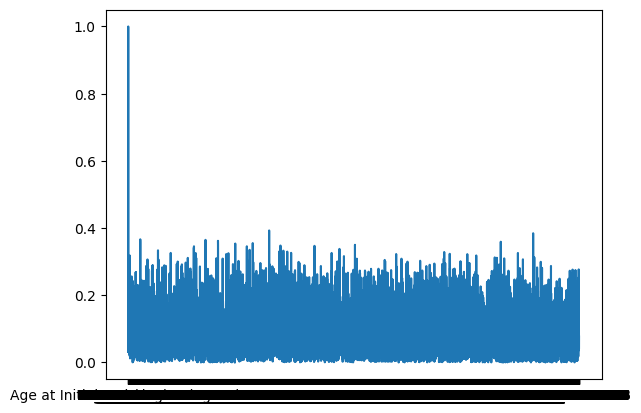

In [226]:
plt.plot(x)

In [229]:
len(x[x["Tumor"]>0.3].index.tolist())

71

In [231]:
final2 = final[x[x["Tumor"]>0.3].index.tolist()] #keeping features above 0.2 corelation, 444 proteins 

In [232]:
scaler = MinMaxScaler() #scaling
final2_scale = pd.DataFrame(scaler.fit_transform(final2.drop('Tumor', axis=1)),columns=final2.columns.to_list()[1:])

In [ ]:
plt.plot(final2_scale.var())

In [254]:
X = final2_scale
y = final2['Tumor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [255]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Precision:", precision_score(y_test, preds, average='micro'))
print("Recall:",recall_score(y_test, preds, average='micro'))
print("F1-Score:", f1_score(y_test, preds, average='micro'))
print(confusion_matrix(y_test, preds))

XGBoost's prediction accuracy is: 75.00
Precision: 0.75
Recall: 0.75
F1-Score: 0.75
[[ 0  2  0  0]
 [ 0 17  0  0]
 [ 0  3  0  0]
 [ 0  1  0  1]]


In [256]:
final2['Tumor'].value_counts()

1    51
2    11
0    10
3     5
Name: Tumor, dtype: int64

In [271]:
pca = PCA(n_components=5,random_state=42)
r = pca.fit_transform(X = X_train.values)
X_train_pca = pd.DataFrame(pca.transform(X_train.values))
print(X_train.shape, X_train_pca.shape)

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)

preds = xgb.predict(X_test_pca)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Precision:", precision_score(y_test, preds, average='micro'))
print("Recall:",recall_score(y_test, preds, average='micro'))
print("F1-Score:", f1_score(y_test, preds, average='micro'))
print(confusion_matrix(y_test, preds))

(53, 70) (53, 5)
XGBoost's prediction accuracy is: 66.67
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-Score: 0.6666666666666666
[[ 0  2  0  0]
 [ 0 15  0  2]
 [ 0  3  0  0]
 [ 0  1  0  1]]


C:\Users\shasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
